In [13]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
print(tf.__version__)

2.9.1


In [2]:
data = pd.read_csv("data.csv")
data = data.fillna(0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
data = pd.concat([data.iloc[:,1:14], data.iloc[:,15]], axis=1)

In [4]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [5]:
x = data.iloc[:,1:-1]

In [41]:
x = tf.constant(x)
x.shape

TensorShape([4600, 12])

In [52]:
y = data.iloc[:,1]

In [61]:
y = tf.constant(y)
# y = tf.expand_dims(y, axis=1)
y = tf.reshape(y, shape=(4600,1))
y.shape

TensorShape([4600, 1])

In [62]:
X=x

In [63]:
y

<tf.Tensor: shape=(4600, 1), dtype=float64, numpy=
array([[3.],
       [5.],
       [3.],
       ...,
       [3.],
       [4.],
       [3.]])>

In [77]:
# train, val and test sizes:
size_train = int(0.5*len(X))
size_val = int(0.4*len(X))

# Training Data:
X_train = X[:size_train]
y_train = y[:size_train]

# Validation Data:
X_val = X[size_train:size_val]
y_val = y[size_train:size_val]

# Test Data:
X_test = X[size_val:]
y_test = y[size_val:]

In [78]:
# Specific loss metric:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

def r2_score(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [102]:
c1 = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0.01,
    patience=10,
    verbose=1
)

In [108]:
input_shape = X.shape

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
              metrics = ["mae","mse",r2_score])

model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          epochs = 100,
          batch_size=32,
          callbacks=[c1])

TypeError: __init__() missing 1 required positional argument: 'kernel_size'

In [92]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (1, 10)                   130       
                                                                 
 dense_40 (Dense)            (1, 1)                    11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [94]:
model.evaluate(X_test, y_test)

87/87 [==============================] - 0s 2ms/step - loss: 3.4214 - mae: 3.4214 - mse: 12.5250 - r2_score: -16.7231


[3.4213767051696777,
 3.4213767051696777,
 12.524999618530273,
 -16.72308921813965]

87/87 [==============================] - 0s 2ms/step


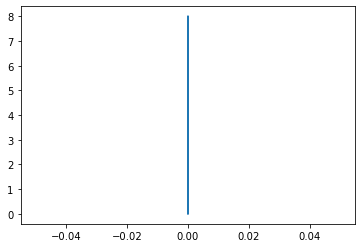

In [97]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)
y_test

plt.plot(predictions,y_test)